In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('cleaned_diabetes.csv')
df

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,87654,M,30.0,7.1,81.0,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
939,24004,M,38.0,5.8,59.0,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
940,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
941,454316,M,55.0,3.2,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y


## Univariate Data Analysis

This is the analysis of a single variable

Techniques include:
- Histogram
- Boxplot
- Count plot
- Stem and Leaf plot

Most common questions answered using univariate analysis
- Most common value
- Average value
- Range of the values
- Presence of outliers
 - Skewness and kurtosis

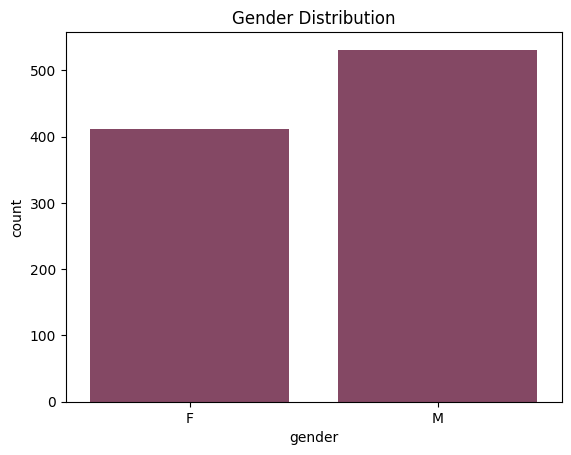

In [3]:
# Count Plot
sns.countplot(x= df['gender'], color = '#8E3E63')
plt.title("Gender Distribution");

**Observation**

- There are more males than females in this dataset

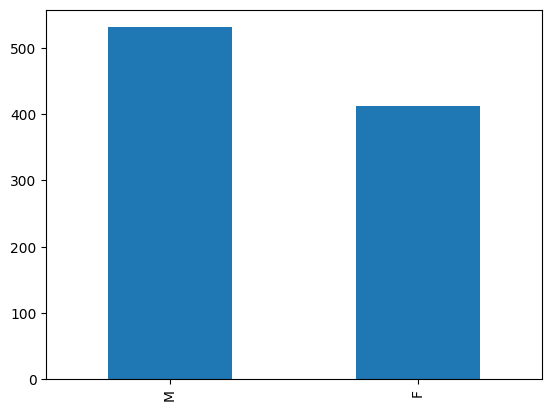

In [4]:
# Using matplotlib to make a count plot
# Really it is a bar plot
df['gender'].value_counts().plot(kind = 'bar');

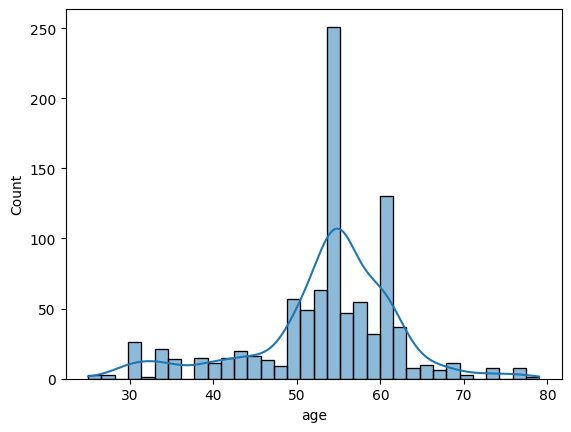

In [5]:
# Histogram
sns.histplot(df['age'], kde = True);

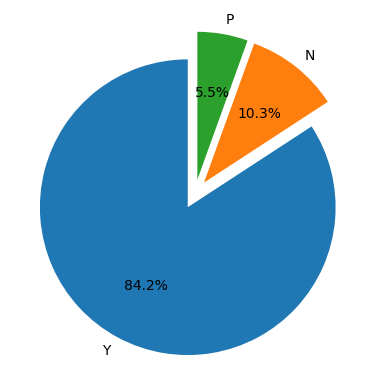

In [6]:
# Pie chart
class_count = df['class'].value_counts()
class_count
plt.pie(class_count, labels= 
        class_count.index, 
        autopct='%.1f%%',
       startangle= 90, 
        explode= [0.1,0.1,0.1]);
# data = class_count
# labels for each pie: labels = class_count.index
# autopct = '%.2f%%' - Show percentages with 2dp
# startangle: rotates the chart
# explode: separates the pie slices

## Bivariate Data Analysis

This is the analysis of two variables to identify patterns, trends and correlations

Analysis Techniques
- Scatter plot
- Correlation coefficient
- Regression analysis

Answers question like:
- Relationship between the variables
- Strength and direction of the relationship

class    N   P    Y
gender             
F       60  17  335
M       37  35  459


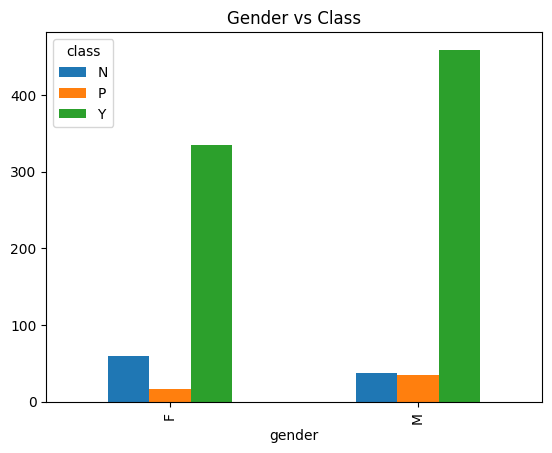

In [7]:
# Analyzing Categorical Data
cross_gender = pd.crosstab(df['gender'], df['class'])
print(cross_gender)

# Using a bar plot
cross_gender.plot(kind = 'bar')
plt.title('Gender vs Class');

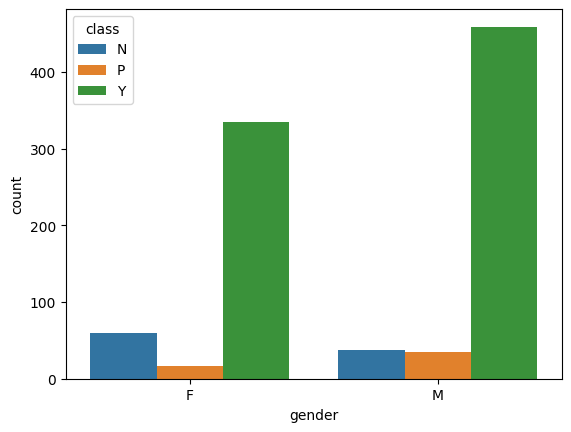

In [8]:
# Using seaborn
sns.countplot(x = 'gender', hue = 'class', data = df);
# Hue helps to group the data
# Or rather, hue makes the legend

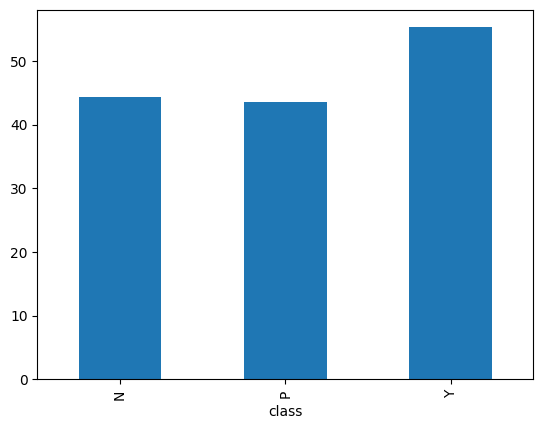

In [9]:
# Age vs Class
age_gr = df.groupby('class')['age'].mean()
age_gr.plot(kind = 'bar');

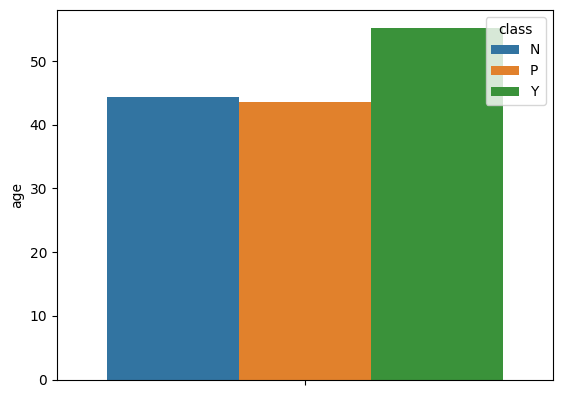

In [18]:
#Seaborn
sns.barplot(y = 'age', hue ='class', data = df, errorbar = None);

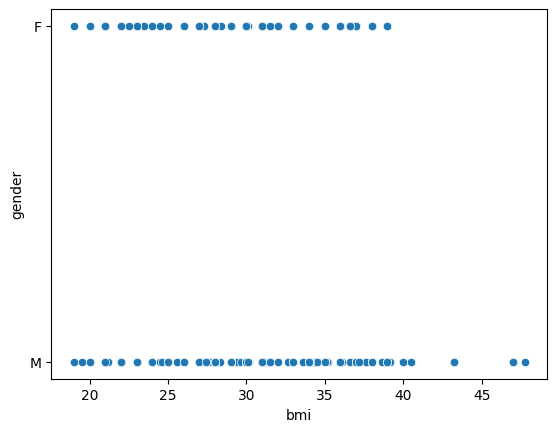

In [17]:
# BMI vs Age
sns.scatterplot(y = 'gender', x = 'bmi', data = df);

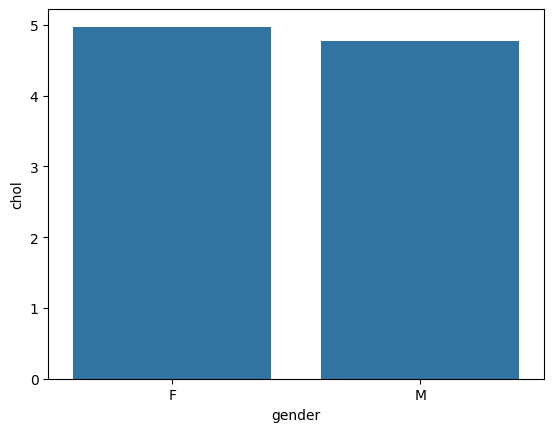

In [22]:
sns.barplot(x = 'gender', y = 'chol', data = df, errorbar = None);

In [33]:
# How to only get numerical values
num_df = [['age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi']]
num_df

[['age', 'urea', 'cr', 'hba1c', 'chol', 'tg', 'hdl', 'ldl', 'vldl', 'bmi']]

In [34]:
# Another method
df_num = df.select_dtypes(include = 'number')
df_num.head()

,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [29]:
df = df.drop('patient_no', axis = 1)

In [30]:
df.columns

Index(['gender', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg', 'hdl', 'ldl',
       'vldl', 'bmi', 'class'],
      dtype='object')

In [35]:
# Getting a correlation Table
corr_table = df_num.corr()
corr_table

,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
age,1.000000,0.141527,0.057741,0.389152,0.041496,0.147468,-0.011101,0.024137,-0.093585,0.363518
urea,0.141527,1.000000,0.474195,-0.010402,0.009727,0.016709,-0.020102,-0.016455,0.024313,0.028675
cr,0.057741,0.474195,1.000000,-0.129460,-0.017289,0.016649,-0.030993,0.078295,0.120348,-0.009097
hba1c,0.389152,-0.010402,-0.129460,1.000000,0.167249,0.227476,0.031480,0.013951,0.070647,0.415504
chol,0.041496,0.009727,-0.017289,0.167249,1.000000,0.327530,0.101340,0.424373,0.071789,0.017515
tg,0.147468,0.016709,0.016649,0.227476,0.327530,1.000000,-0.089077,0.003468,0.150119,0.101773
hdl,-0.011101,-0.020102,-0.030993,0.031480,0.101340,-0.089077,1.000000,-0.148146,-0.061217,0.076533
ldl,0.024137,-0.016455,0.078295,0.013951,0.424373,0.003468,-0.148146,1.000000,0.065095,-0.057793
vldl,-0.093585,0.024313,0.120348,0.070647,0.071789,0.150119,-0.061217,0.065095,1.000000,0.204286
bmi,0.363518,0.028675,-0.009097,0.415504,0.017515,0.101773,0.076533,-0.057793,0.204286,1.000000


In [43]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

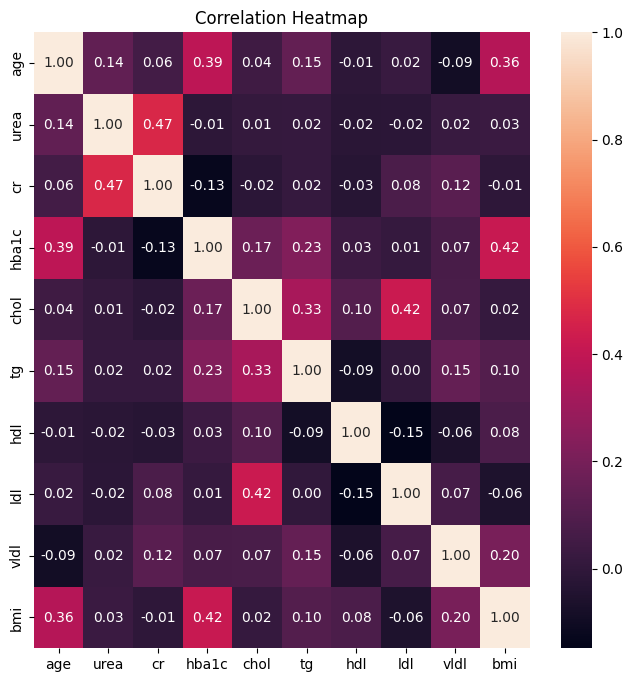

In [50]:
# Heatmap
plt.figure(figsize = (8,8))
sns.heatmap(corr_table, annot = True, fmt = ".2f")
plt.title('Correlation Heatmap');

## Multivariate Data Analysis
Statistical analysis used to describe and summarize the relationship between three or more variables

It is used to visualize 2 numerical variables and 1 categorical variable

Techniques
- Multiple Regression Analysis
- Factor Analysis
- Cluster Analysis
- Discriminant Analysis

Questions Answered:
- What are the most important factors that influence a particular outcome?
- How can we group observations into clusters based on their similarity

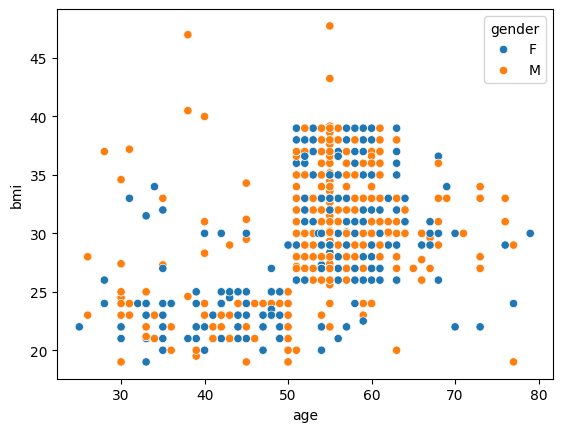

In [52]:
# Scatterplot
sns.scatterplot(x = 'age', y = 'bmi', hue = 'gender', data = df);

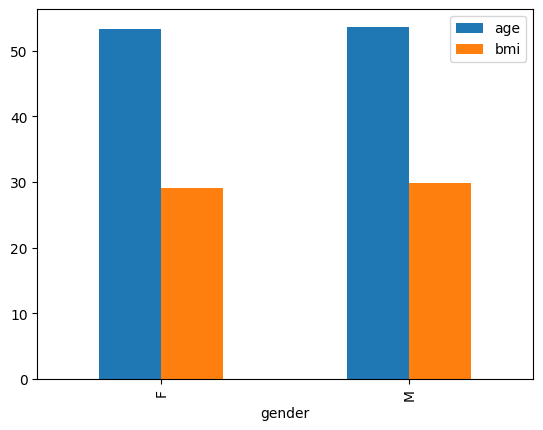

In [55]:
# Data Preparation by groupby for bar chart
grp_age = df.groupby('gender')[['age', 'bmi']].mean()
grp_age.plot(kind = 'bar');

# Not the clearest in my opinion